<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA
AutoRegressive Integrated Moving Average


*   ARIMA is not capable to perfectly predict any time series data especially in cases where data is not a function of time-- stock data, for instance.
*   ARIMA performs very well when working with a time series where data is directly related to the timestamp, such as the airline passenger data set which clearly shows growth and  seasonality.
* Non-seasonal ARIMA models are generally denoted ARIMA (p, d, q) where parameters p, d, q are non-negative integers.

## Parts of an ARIMA Model



*   AR (p) -- Autoregression 
      * A regression model that utilizes the dependant relationship between a current observation and observations over a previous period.

*   I (d) -- Integrated
    * Differencing of observations (subtracting  an observation from an observation at the previous time step) in order to make the time series stationary. 
 
 * MA (q) -- Moving Average
    * A model that uses the dependency between an observation and a residual error from a moving average model applied to laggeg observations 





In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from statsmodels.tsa.ar_model import AR, ARResults 

In [0]:
# import data -- US Population dataframe

df = pd.read_csv('uspopulation.csv', index_col = 'DATE', parse_dates = True )

In [0]:
# set frequency to 'MS'
df.index.freq = 'MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


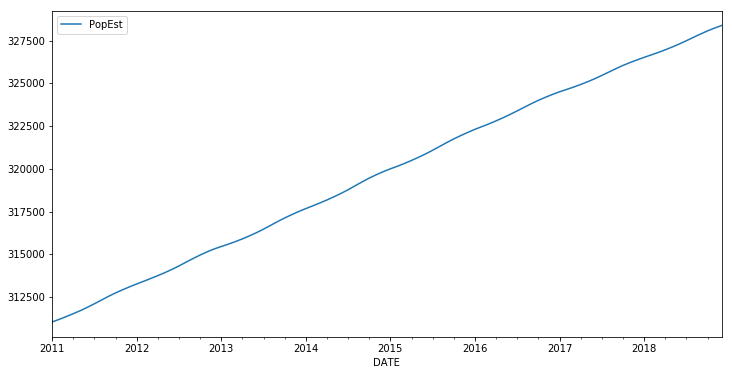

In [6]:
df.plot(figsize = (12,6))

In [0]:
# Split data into train and test sets
# We will need 12 months to test and df has 96 months

train = df.iloc[:84]
test  = df.iloc[84:]

In [0]:
# ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [0]:
# Let's train an AR order 1 model

model = AR(train['PopEst'])

In [0]:
# Fit model
# maxlag paramerter defines the order we are going to use 
AR1fit = model.fit(maxlag = 1)

In [11]:
# Get mdoel parameters
AR1fit.k_ar

1

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [0]:
# Making Predictions
start = len(train)
end = len(train) + len(test) -1 

In [14]:
start

84

In [15]:
end

95

In [16]:
# use trained modelt to make predictins

AR1fit.predict(start = start, end = end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [17]:
test.head()

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134


In [0]:
predictions1 = AR1fit.predict(start = start, end = end)

In [0]:
predictions1 = predictions1.rename('AR-1 Predictions')

In [20]:
 predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR-1 Predictions, dtype: float64

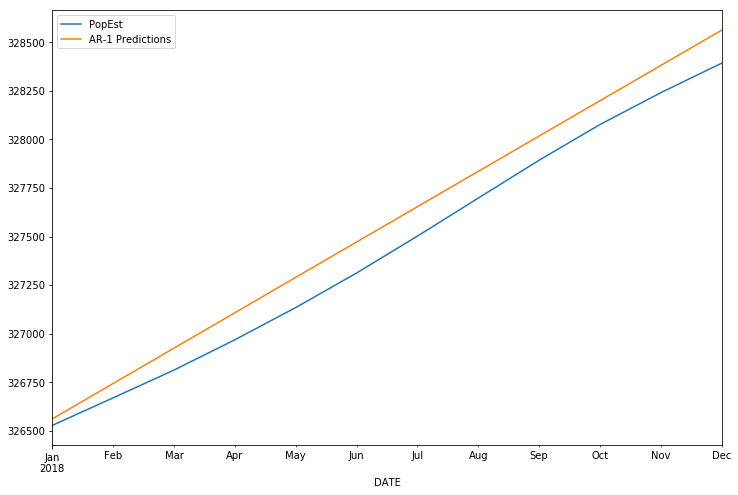

In [21]:
# plot results

test.plot(figsize=(12,8), legend = True)
predictions1.plot(legend = True)

Although the general trend looks correct, it seems like the model is overestimating the number of births. We can improve the model by increasing the order to 2. 

In [0]:
AR2fit = model.fit(maxlag = 2)

In [23]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [0]:
predictions2 = AR2fit.predict(start, end)

In [0]:
predictions2 = predictions2.rename('AR-2 Predictions')

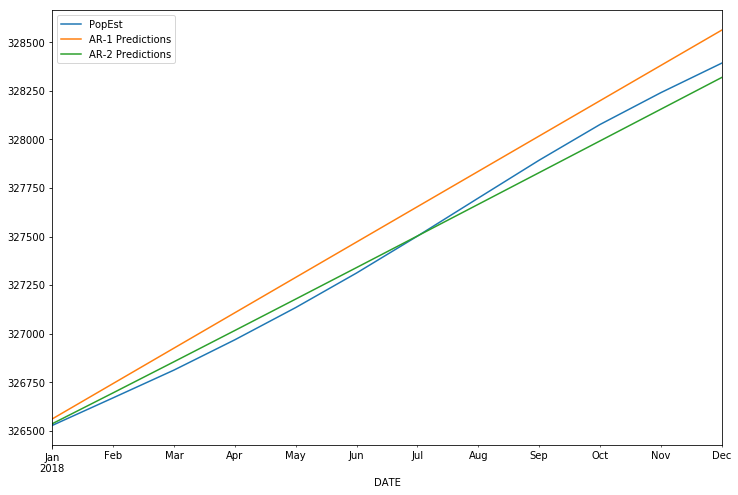

In [28]:
# plot all 3

test.plot(figsize=(12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

In [0]:
ARfit = model.fit(ic='t-stat')

In [30]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [0]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR-8 Predictions')

In [0]:
from sklearn.metrics import mean_squared_error


In [0]:
labels = ['AR-1', 'AR-2', 'AR-8' ]

In [0]:
preds = [predictions1, predictions2, predictions8 ]

In [39]:
# print MSE
for i in range(3):
  error = mean_squared_error(test['PopEst'], preds[i])
  print(f'{labels[i]} MSE was:{error}')

AR-1 MSE was:17449.71423587912
AR-2 MSE was:2713.2585540102214
AR-8 MSE was:186.97053754548145


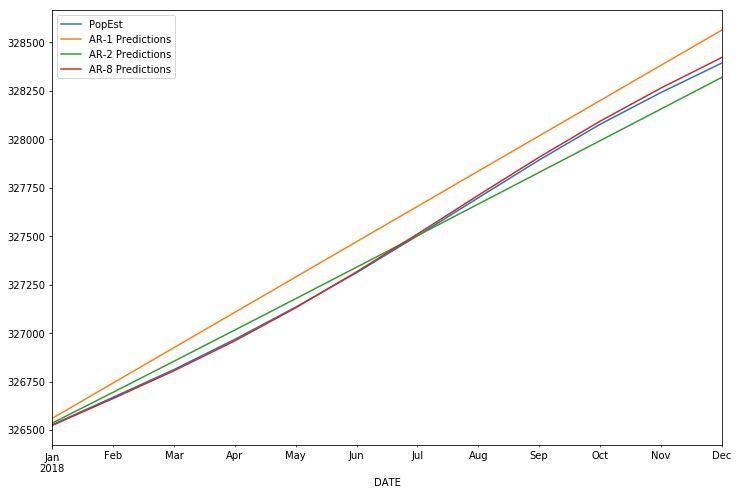

In [40]:
# plot all

test.plot(figsize=(12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions8.plot(legend = True)

In [0]:
# Forecasting

model = AR(df['PopEst'])

ARfit = model.fit()

forecasted_values = ARfit.predict(start = len(df), end = len(df) + 12).rename('Forecast')

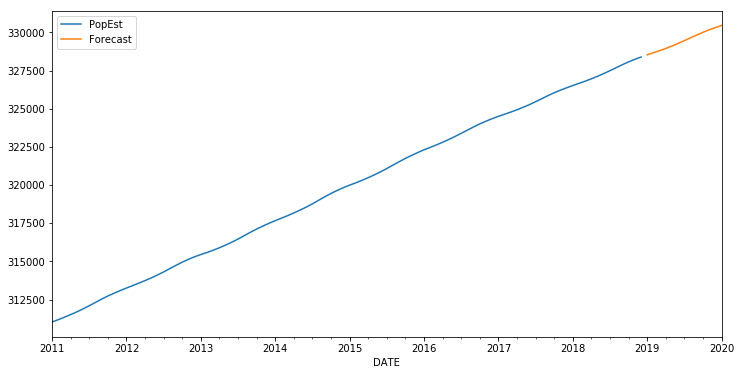

In [43]:
# plot the forecast

df['PopEst'].plot(figsize = (12,6), legend = True)
forecasted_values.plot(legend = True)